In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/platesv2/sample_submission.csv
/kaggle/input/platesv2/plates.zip


In [2]:
import os
import zipfile

# Path to the dataset in the Kaggle environment
dataset_path = '/kaggle/input/platesv2/plates.zip'

# Directory where to extract the dataset
extract_dir = '/kaggle/working/'

# Extract the zip file
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# After extraction directory
print("Dataset extracted successfully to:", extract_dir)


Dataset extracted successfully to: /kaggle/working/


2024-06-28 11:32:36.003204: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-28 11:32:36.003391: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-28 11:32:36.174095: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


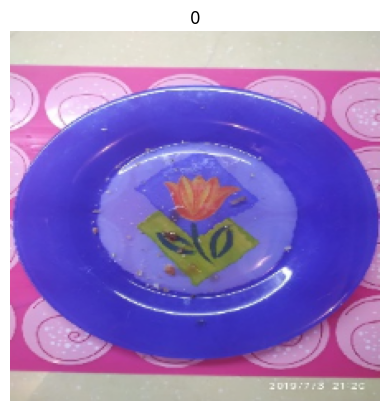

Number of images: 40
Labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

# Paths to the train folders (after extraction)
train_dirty_dir = '/kaggle/working/plates/train/dirty/'
train_cleaned_dir = '/kaggle/working/plates/train/cleaned/'

# Function to load and preprocess images from train folders
def load_and_preprocess_images(dir_dirty, dir_cleaned, target_size=(224, 224)):
    images = []
    labels = []
    
    # Load and preprocess images from 'dirty' folder
    for filename in os.listdir(dir_dirty):
        img_path = os.path.join(dir_dirty, filename)
        img = cv2.imread(img_path)  # Read image using OpenCV
        if img is not None:
            img = cv2.resize(img, target_size)  # Resize image to target size
            images.append(img)
            labels.append(0)  # Label 'dirty' as 0
    
    # Load and preprocess images from 'cleaned' folder
    for filename in os.listdir(dir_cleaned):
        img_path = os.path.join(dir_cleaned, filename)
        img = cv2.imread(img_path)  # Read image using OpenCV
        if img is not None:
            img = cv2.resize(img, target_size)  # Resize image to target size
            images.append(img)
            labels.append(1)  # Label 'cleaned' as 1
    
    return images, labels

# Load and preprocess images from 'dirty' and 'cleaned' folders
images, labels = load_and_preprocess_images(train_dirty_dir, train_cleaned_dir)

# Convert lists to numpy arrays for further processing
images = np.array(images)
labels = np.array(labels)

# Example: Display one image
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for matplotlib
plt.title(labels[0])
plt.axis('off')
plt.show()

# Example: Print number of images and their labels
print(f"Number of images: {len(images)}")
print(f"Labels: {labels}")


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,132,033 (42.47 MB)

 Trainable params: 11,132,033 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.3958 - loss: 2.9809 - val_accuracy: 0.3750 - val_loss: 0.7087
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 954ms/step - accuracy: 0.5625 - loss: 0.9935 - val_accuracy: 0.6250 - val_loss: 0.7213
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 992ms/step - accuracy: 0.5625 - loss: 0.7690 - val_accuracy: 0.3750 - val_loss: 0.9066
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 948ms/step - accuracy: 0.4792 - loss: 0.7960 - val_accuracy: 0.2500 - val_loss: 0.6985
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 927ms/step - accuracy: 0.7917 - loss: 0.6460 - val_accuracy: 0.3750 - val_loss: 0.7552
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 914ms/step - accuracy: 0.6875 - loss: 0.6066 - val_accuracy: 0.3750 - val_loss: 0.7291
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 946ms/step - accuracy: 0.8958 - loss: 0.5377 - val_accuracy: 0.3750 - val_loss: 0.8310
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 934ms/step - accuracy: 0.7292 - loss: 0.4795 - val_accuracy: 0.6250 - val_loss: 0.

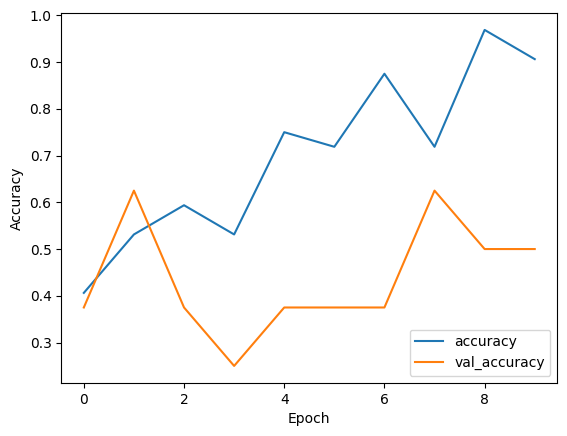

In [4]:
# Normalize pixel values to [0, 1] and ensure float32 dtype
images = images.astype('float32') / 255.0

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define a simple CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val))

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


In [5]:
# Path to the test folder
test_dir = '/kaggle/working/plates/test/'

# Function to load and preprocess test images
def load_and_preprocess_test_images(test_dir, target_size=(224, 224)):
    test_images = []
    test_ids = []

    for filename in os.listdir(test_dir):
        img_path = os.path.join(test_dir, filename)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, target_size)
            test_images.append(img)
            test_ids.append(filename.split('.')[0])  # Extract id from filename

    test_images = np.array(test_images)
    test_images = test_images.astype('float32') / 255.0  # Normalize to [0, 1]

    return test_images, test_ids

# Load and preprocess test images
test_images, test_ids = load_and_preprocess_test_images(test_dir)


In [6]:
# Make predictions on test images
predictions = model.predict(test_images)

# Convert predictions to labels ('cleaned' or 'dirty')
threshold = 0.5  # Example threshold for binary classification
predicted_labels = ['cleaned' if pred > threshold else 'dirty' for pred in predictions]

# Create a DataFrame for submission
submission_df = pd.DataFrame({'id': test_ids, 'label': predicted_labels})

# Display the first few rows of the submission DataFrame
print(submission_df.head())


24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 438ms/step
     id  label
0  0561  dirty
1  0218  dirty
2  0685  dirty
3  0321  dirty
4  0731  dirty


In [7]:
# Save submission file
submission_df.to_csv('/kaggle/working/Cleaned_vs_Dirty_Classifier.csv', index=False)
